**Project Objective:**
The aim of the project is to explore the Iris dataset and use a Machine Learning model to predict the Species based on the flower's petal and sepal lengths and widths.

**About Dataset:** The iris flower dataset is the most popular multivariate dataset used for testing various machine learning models. The dataset classifies the iris flowers in to three species - Iris-Setosa, Iris-Versicolor, Iris-Virginica based on Sepal Length, Sepal Width, Petal Length and Petal Width.


**Import the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Let's check the shape of the dataset.

**Understanding the data**

In [ ]:
df.shape

(150, 6)

There are 150 observations and 5 columns. The "id" column has less significance so let's drop it.

In [ ]:
df.drop("Id",axis=1,inplace=True)

Check whether the data is balanced or not.

In [ ]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

All the species are having equal count. So the data is well-balanced. Now let's gather some general information about the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Insights**


*   There are no null values in the dataset.
*   All the features are in numerical datatype.

*   Only output column has categorical data.






In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From the above statistical data we can understand the mean, minimum, maximum, standard deviation etc.

**Exploratory Data Analysis:**

We will perform Bi-variate and Multi-variate Analysis on the dataset.


**Bivariate Analysis**


I have taken two features Petal length and Petal Width in the first plot and the other two features Sepal Width and Sepal Length on the other and made a scatter plot.

Text(0.5, 1.0, 'Iris Flower Classification')

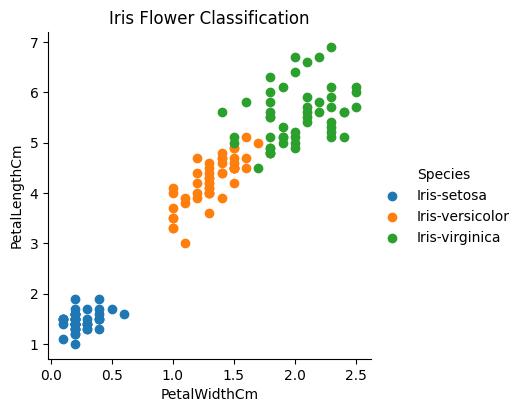

In [ ]:
sns.FacetGrid(df,hue="Species",height=4).map(plt.scatter,"PetalWidthCm","PetalLengthCm").add_legend()
plt.title("Iris Flower Classification")

**Observations:**

*   Setosa species have small petals followed by Versicolor.
*   Versicolor and Virginica species have some overlapping.

*   We need to use sepal dimensions also for proper classification.

*   Petal Length and Width have positive correlation.








Text(0.5, 1.0, 'Iris Flower Classification')

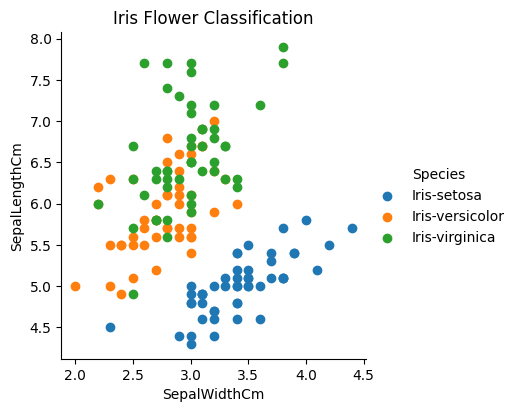

In [ ]:
sns.FacetGrid(df,hue="Species",height=4).map(plt.scatter,"SepalWidthCm","SepalLengthCm").add_legend()
plt.title("Iris Flower Classification")

**Observations:**

*   Iris-setosa has comparatively less sepal sizes.

*   Sepal dimensions of versicolor and virginica are almost similar.
*   So classification by just sepal dimensions is not possible.


*   All four features are required for accurate classification of Iris flowers.



**Multivariate Analysis**

We are using seaborn pairplot method here.

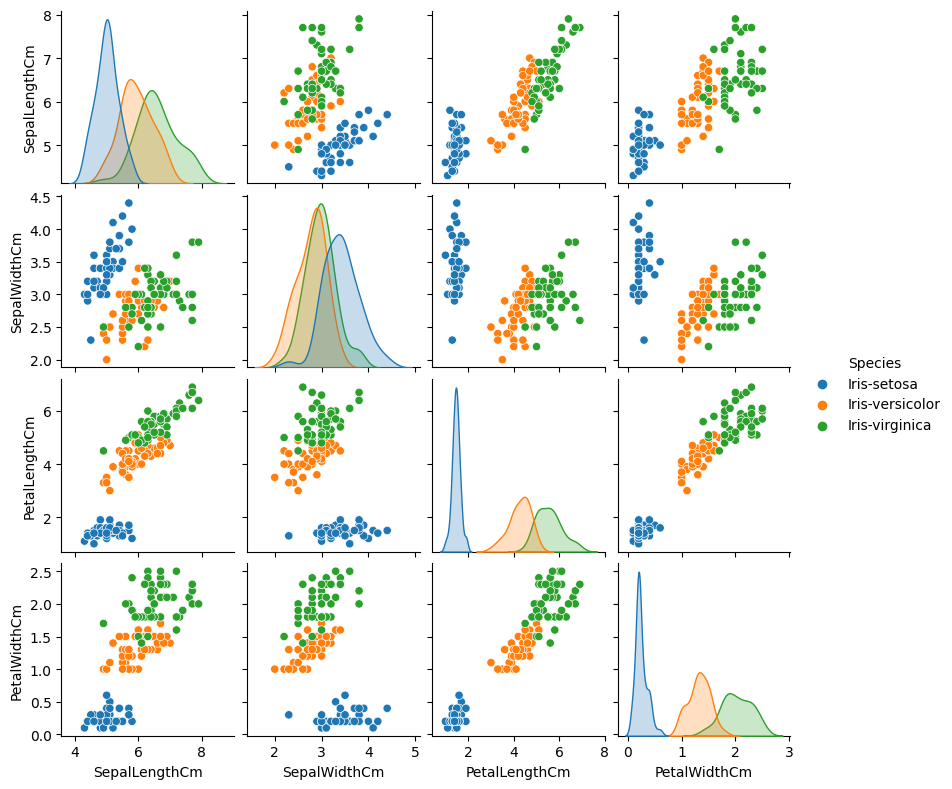

In [ ]:
sns.pairplot(df,hue="Species",height=2)

**Observations**
*   Iris-Virginica has bigger size flowers.
*   Iris-Versicolor has dimensions in between the other two.
*   It is easy to differentiate Iris-setosa from the other two species.
*   All four features are neede for proper classification.

**Checking Correlation**

<ipython-input-36-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

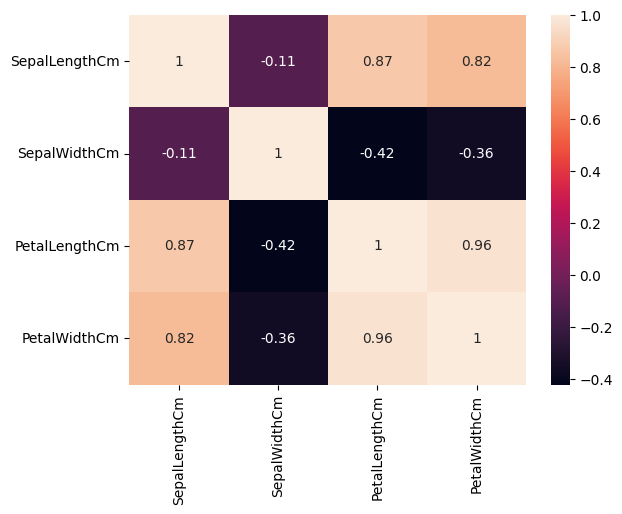

In [ ]:
sns.heatmap(df.corr(),annot=True)

**Observations**

*   Petal length and Petal width have high positive correlation
*   Sepal Length and Petal Length also have positive correlation
*   Sepal width and length are negatively correlated.

**Model Development**

In [ ]:
#import the necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

In [ ]:
#Split the features and Output columns
X=df.iloc[:,:-1] #feature
y=df.iloc[:,-1] #output

In [ ]:
#Scaling the values using MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [ ]:
#split the train and test set

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

**KNeighborsClassifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

**Model Evaluation**

Accuracy Score: 97.77777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



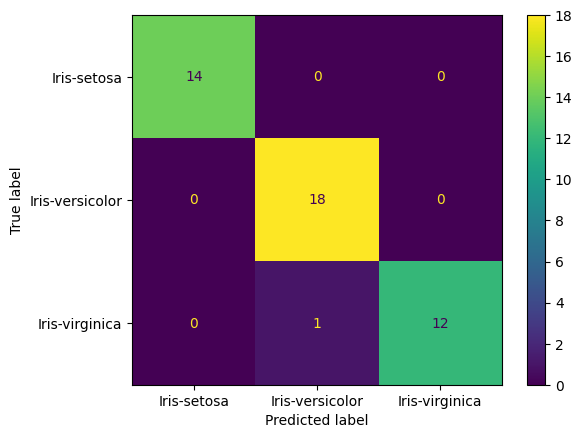

In [ ]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_knn)*100)
print(classification_report(y_test,y_pred_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))

The model has 98% accuracy. Only one iris-virginica is misclassified as iris-versicolor. So the performance of the model is good.